In [51]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import pair_confusion_matrix, normalized_mutual_info_score, silhouette_score, adjusted_rand_score, homogeneity_score

In [52]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [53]:
x, y = digits['data'], digits['target']

In [54]:
x.shape #8x8 img

(1797, 64)

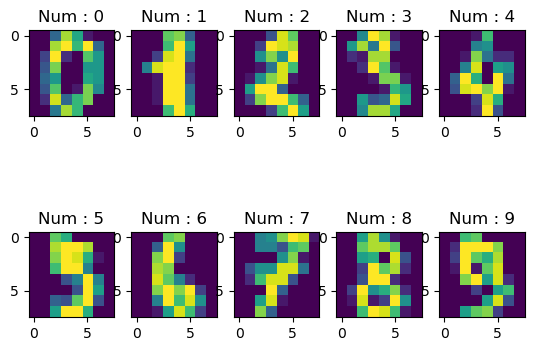

In [55]:
#plotting img

fig, axes = plt.subplots(2,5)
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x[i].reshape(8,8))
    ax.set_title(f'Num : {y[i]}')

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

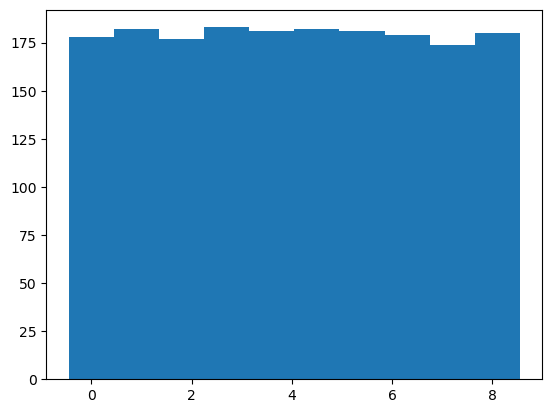

In [56]:
#sample distribution
plt.hist(y, bins=10, align='left')

c:\Users\Thaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



====================___metrics___====================

nmi=0.7520693280544117
sil=0.16723488891799523
ari=0.6486797257901558
homogen=0.7479563310879256



<Axes: >

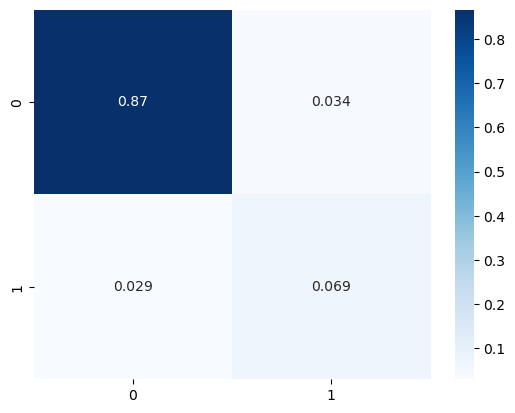

In [65]:
#split
x_train, x_test, y_train, y_test = train_test_split(x, y)

#model
cluster = KMeans(n_clusters=10)
cluster.fit(x_train)
y_hat = cluster.predict(x_test)

#eval
nmi = normalized_mutual_info_score(y_test, y_hat)
print('\n'+20*'='+'___metrics___'+20*'='+'\n')
print(f'{nmi=}')
sil = silhouette_score(x_test, y_hat)
print(f'{sil=}')
ari = adjusted_rand_score(y_test,y_hat)-
print(f'{ari=}')
homogen = homogeneity_score(y_test, y_hat)
print(f'{homogen=}')
print('\n'+50*'=')
pairmatrix = pair_confusion_matrix(y_test, y_hat)
pairmatrix = pairmatrix /pairmatrix.sum()
sns.heatmap(pairmatrix, annot=True, cbar= True, cmap = 'Blues')